<div style="width:100%;height:100px;text-align:center;border: 4px solid black;background-color:#E6BF00;color:white">

<header style="width:100%;height:100px;">
  <h1><b> Session 003</b></h1>
    <h4> Basic Natural language processing </h4>
</header>

<div> 

<div style='border: 4px solid #E6BF00;padding:9px;'>

By: Farhad Shadmand 
    
https://github.com/farhadsh1992
    
</div>

<div style="border: 4px solid #3550B7;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>

https://textminingonline.com/best-coursera-courses-for-machine-learning
    
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
<hr>

http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
  
https://towardsdatascience.com/using-scikit-learn-to-find-bullies-c47a1045d92f
    
https://www.kaggle.com/eswarbabu88/toxic-comment-glove-logistic-regression
    
https://www.kaggle.com/stacykurnikova/using-glove-embedding
    
https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
    
https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python
    
https://markhneedham.com/blog/2018/05/19/interpreting-word2vec-glove-embeddings-sklearn-neo4j-graph-algorithms/
    
http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
    
https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
    
https://www.kaggle.com/reiinakano/basic-nlp-bag-of-words-tf-idf-word2vec-lstm
    
</div>

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Result of ML <h1>
</div>

In [ ]:
# For dimonation = 100
df_re = pd.DataFrame(result)
df_re.sort_values('cross_validation_train').head(len(df_re))

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>  Load data <h1>
</div>

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
#data_path = '/Users/apple/Documents/Programming/python/Project/data/Clean_tweets/2Tesla_label_from_2010-06-29_to_2019-02-26_2019227.csv'
data_path = "/Users/apple/Documents/Programming/pyfile/DataBase/project_data/Third__CLean_training.1600000.process.csv"
df_data = pd.read_csv(data_path)
df_data = df_data.dropna().reset_index()
def xx(x):
    if x==4:
        return 1
    else:
        return x
df_data['label'] = df_data['label'].apply(xx)
#df_data['text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON- ','',x))
#df_data['text'] = df_data['clean_text'].apply(lambda x: re.sub('-PRON-','',x))
#df_data = df_data.reindex()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530184 entries, 0 to 1530183
Data columns (total 4 columns):
index         1530184 non-null int64
created_at    1530184 non-null object
text          1530184 non-null object
label         1530184 non-null int64
dtypes: int64(2), object(2)
memory usage: 46.7+ MB


In [4]:
df_data.head(5)

,index,created_at,text,label
0,0,Mon Apr 06 22:19:49 PDT 2009,upset not updat facebook text might cri result...,0
1,1,Mon Apr 06 22:19:53 PDT 2009,dive mani time ball manag save rest go bound,0
2,2,Mon Apr 06 22:19:57 PDT 2009,whole bodi feel itchi like fire,0
3,3,Mon Apr 06 22:19:57 PDT 2009,not behav mad whi becaus not see,0
4,4,Mon Apr 06 22:20:00 PDT 2009,not whole crew,0


In [6]:
df_data.columns

Index(['index', 'created_at', 'text', 'label'], dtype='object')

In [6]:
df_data.groupby('label').sum()

,index
label,
0,309002753189
1,909366717500


In [5]:
result = {}
result['title'] = []
result['cross_validation_train'] = []
result['accuracy_test'] = []

def result_maker(title,scoe,acc):
    result['title'].append(title)
    result['cross_validation_train'].append(scoe.mean())
    result['accuracy_test'].append(acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ELMO <h1>
</div>

In [7]:
from farhad.Elmo_Thrones import ELMO_AWS

In [8]:
%%time
df = df_data.text
elmo = ELMO_AWS()
embed_data = elmo.Universal_Encoder(df,mode='dim50',kind='norm')

print(len(embed_data))
print(len(embed_data[1]))
print(embed_data[1])

INFO:tensorflow:Using /var/folders/x3/r4c3zj896_55ywhdnh66wx0w0000gn/T/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1'.
INFO:tensorflow:Downloading https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1: 67.99MB
INFO:tensorflow:Downloading https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1: 147.99MB
INFO:tensorflow:Downloaded https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1, Total size: 191.82MB
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim50-with-normalization/1'.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
a 50 dimensional vector as the sentence embedding.
1530184
50
[ 0.33115426 -0.10989723 -0.21372138  0.05810443 -0.20850305  0.14816043
  0.31717023 -0.16185832 -0.23040801  0.

In [ ]:
data_path = "/Users/apple/Documents/Programming/pyfile/DataBase/project_data/Third_Elmo_CLean_training.1600000.process.csv"
df_new = pd.DataFrame
df_data['elmo_dim50_norm'] = embed_data
df_data.to_csv(data_path,index=False)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> Dimensional_Reduction <h1>
</div>

In [103]:
#from sklearn.decomposition import PCA

In [188]:
#pca_ = PCA(n_components=5)
#viz_data = pca_.fit_transform(data_vectorized.toarray()) 

In [189]:
#print('Lenght of data:',len(viz_data))
#print('Lenght of data:',len(viz_data[12]),len(viz_data[22]))

Lenght of data: 2816
Lenght of data: 5 5


In [11]:
#viz_data[1]

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> model_selection <h1>
</div>

In [13]:
x = embed_data
y = [i for i in df_data['label']]

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y ,test_size=0.20, random_state =32, shuffle=True)

print(y_train[1:10])
print(x_train[0])

[0, 1, 0, 1, 1, 0, 1, 0, 0]
[-0.02761514 -0.09020913 -0.09934    -0.00185857 -0.10190345 -0.10876381
 -0.01109698 -0.04313733 -0.16906379  0.0329702   0.11382925 -0.19892181
  0.08809027  0.00993301  0.0422711   0.11518244 -0.12084115  0.20107675
 -0.10751113 -0.12613867 -0.11225299 -0.08821397 -0.06648355 -0.00998818
 -0.1236593  -0.05459116 -0.1343007  -0.21988009  0.32639402 -0.1107012
 -0.17352934  0.04830436  0.21588631  0.11656944 -0.54544216  0.19568387
  0.18214327  0.05705602 -0.06180891 -0.12760827  0.48224244 -0.06555736
 -0.01196959 -0.19339493 -0.14877416  0.20739795  0.12565303  0.01863883
 -0.1567167   0.22887203]


<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LogisticRegression <h1>
</div>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, log_loss, f1_score,mean_squared_error
from farhad_DL.utility import plot_confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: 0.6482562946236238
accuracy: 0.6479477971617811


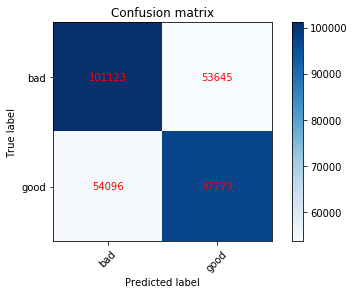

In [21]:
classifier = LogisticRegression(solver='sag')

scoe = cross_val_score(classifier,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [22]:
title = 'LogisticRegression'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> ExtraTreesClassifier <h1>
</div>

In [23]:
from sklearn.ensemble import ExtraTreesClassifier

accuracy: 0.6831009656026504
accuracy: 0.684067612739636


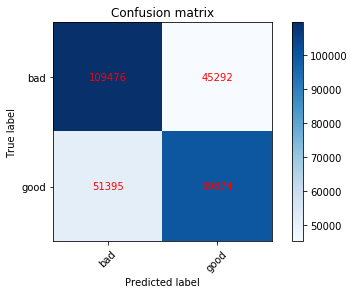

In [24]:
ETC = ExtraTreesClassifier(n_estimators=200)

scoe = cross_val_score(ETC,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())


ETC.fit(x_train, y_train)
y_pred = ETC.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [25]:
title = 'ExtraTreesClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> XGBRegressor <h1>
</div>

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

accuracy: 0.11414109075841591
accuracy: 0.6462094452631545


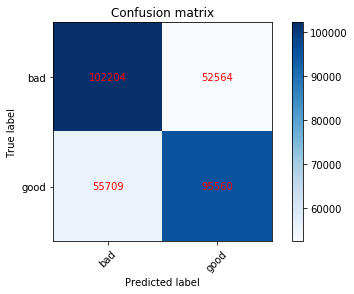

In [27]:
from xgboost import XGBRegressor

model_xgb_Regressor = XGBRegressor(n_estimators=60,early_stopping_rounds='auto',verbose=True,random_state=10)

scoe = cross_val_score(model_xgb_Regressor,x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_xgb_Regressor.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            

acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [28]:
title = 'XGBRegressor'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> KNeighborsClassifier <h1>
</div>

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kmean = KNeighborsClassifier()
scoe = cross_val_score(kmean, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

kmean.fit(x_train, y_train)
y_pred = model_xgb_Regressor.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

accuracy: 0.6775771203235597


NameError: name 'model_xgb_Regressor' is not defined

In [ ]:
title = 'KNeighborsClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> GaussianNB <h1>
</div>

accuracy: 0.5013215077605322
accuracy: 0.5070921985815603


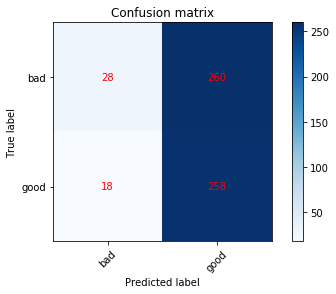

In [204]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
scoe = cross_val_score(GNB, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

GNB.fit(x_train, y_train)
y_pred = GNB.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [205]:
title = ' GaussianNB'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> DecisionTreeClassifier <h1>
</div>

accuracy: 0.5044365607292437
accuracy: 0.5212765957446809


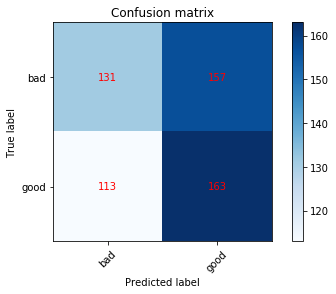

In [206]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=300)
scoe = cross_val_score(model_DecisionTree, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

model_DecisionTree.fit(x_train, y_train)
y_pred = model_DecisionTree.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [207]:
title = 'DecisionTreeClassifier'
result_maker(title,scoe,acc)

<div style="width:100%;height:70px;border: 4px solid black;background-color:#E6BF00;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1> LinearSVC <h1>
</div>

accuracy: 0.5106331608770633
accuracy: 0.5106382978723404


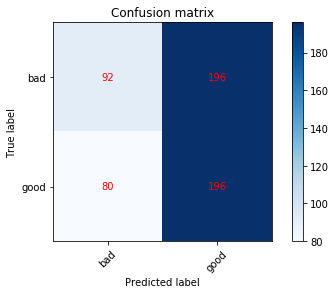

In [208]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

scoe = cross_val_score(LSVC, x_train, y_train , cv=5);
print('accuracy:',scoe.mean())

LSVC.fit(x_train, y_train)
y_pred = LSVC.predict(x_test)
for num in range(len(y_pred)):
    if y_pred[num]>0.50:
        y_pred[num]=1
    else:
         y_pred[num]=0
            
acc = accuracy_score(y_test,y_pred)
print('accuracy:',acc)

cm = confusion_matrix(y_test,y_pred , labels=[0,1])
plot_confusion_matrix(cm, names=['bad','good'])

In [209]:
title = ' LinearSVC'
result_maker(title,scoe,acc)